**IMPORTING NECESSARY LIBRARIES**

In [489]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**READING CSV FILE**

In [491]:
df=pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [492]:
df.head(20)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [494]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

**FEATURE ENGINEERING**

In [496]:
#Removed order id customer name from dataset
df = df[[  'Category', 'Sub Category', 
       'Order Date', 'Sales', 'Region', 'Discount', 'Profit','City','State']]

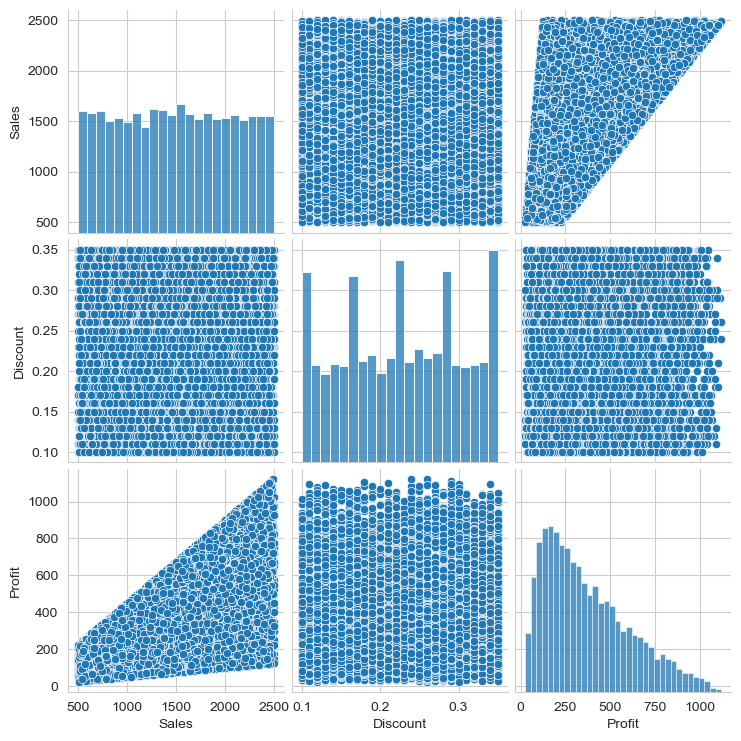

In [497]:
sns.pairplot(df)

**FINDING UNIQUE VALUES IN CATEGORY AND SUB CATEGORY**

In [499]:
df['Sub Category'].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

In [500]:
df["Category"].unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [501]:
#formatting order date column in order to extract useful features
df['Order Date']= pd.to_datetime(df['Order Date'],format = 'mixed',errors= 'coerce')
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day
df['Order_Weekday'] = df['Order Date'].dt.weekday  # 0=Monday, 6=Sunday
df['Order_Dayofyear'] = df['Order Date'].dt.dayofyear
df.head()


,Category,Sub Category,Order Date,Sales,Region,Discount,Profit,City,State,Order_Year,Order_Month,Order_Day,Order_Weekday,Order_Dayofyear
0,Oil & Masala,Masalas,2017-11-08,1254,North,0.12,401.28,Vellore,Tamil Nadu,2017,11,8,2,312
1,Beverages,Health Drinks,2017-11-08,749,South,0.18,149.80,Krishnagiri,Tamil Nadu,2017,11,8,2,312
2,Food Grains,Atta & Flour,2017-06-12,2360,West,0.21,165.20,Perambalur,Tamil Nadu,2017,6,12,0,163
3,Fruits & Veggies,Fresh Vegetables,2016-10-11,896,South,0.25,89.60,Dharmapuri,Tamil Nadu,2016,10,11,1,285
4,Food Grains,Organic Staples,2016-10-11,2355,South,0.26,918.45,Ooty,Tamil Nadu,2016,10,11,1,285


**FINDING NULL AND DUPLICATE VALUES**

In [503]:
# Find null values
df.isna().sum()

Category           0
Sub Category       0
Order Date         0
Sales              0
Region             0
Discount           0
Profit             0
City               0
State              0
Order_Year         0
Order_Month        0
Order_Day          0
Order_Weekday      0
Order_Dayofyear    0
dtype: int64

In [504]:
# check for duplicate records
df.duplicated().any().sum()

0

In [505]:
# Standardize column names to lowercase
df.columns = df.columns.str.lower()

In [506]:
df.head()

,category,sub category,order date,sales,region,discount,profit,city,state,order_year,order_month,order_day,order_weekday,order_dayofyear
0,Oil & Masala,Masalas,2017-11-08,1254,North,0.12,401.28,Vellore,Tamil Nadu,2017,11,8,2,312
1,Beverages,Health Drinks,2017-11-08,749,South,0.18,149.80,Krishnagiri,Tamil Nadu,2017,11,8,2,312
2,Food Grains,Atta & Flour,2017-06-12,2360,West,0.21,165.20,Perambalur,Tamil Nadu,2017,6,12,0,163
3,Fruits & Veggies,Fresh Vegetables,2016-10-11,896,South,0.25,89.60,Dharmapuri,Tamil Nadu,2016,10,11,1,285
4,Food Grains,Organic Staples,2016-10-11,2355,South,0.26,918.45,Ooty,Tamil Nadu,2016,10,11,1,285


In [507]:
# Extracting discount amount from discount rate column
df['discount_amt'] = (df["sales"] * df["discount"]).round().astype(int)

In [508]:
df.head()

,category,sub category,order date,sales,region,discount,profit,city,state,order_year,order_month,order_day,order_weekday,order_dayofyear,discount_amt
0,Oil & Masala,Masalas,2017-11-08,1254,North,0.12,401.28,Vellore,Tamil Nadu,2017,11,8,2,312,150
1,Beverages,Health Drinks,2017-11-08,749,South,0.18,149.80,Krishnagiri,Tamil Nadu,2017,11,8,2,312,135
2,Food Grains,Atta & Flour,2017-06-12,2360,West,0.21,165.20,Perambalur,Tamil Nadu,2017,6,12,0,163,496
3,Fruits & Veggies,Fresh Vegetables,2016-10-11,896,South,0.25,89.60,Dharmapuri,Tamil Nadu,2016,10,11,1,285,224
4,Food Grains,Organic Staples,2016-10-11,2355,South,0.26,918.45,Ooty,Tamil Nadu,2016,10,11,1,285,612


In [509]:
df.columns

Index(['category', 'sub category', 'order date', 'sales', 'region', 'discount',
       'profit', 'city', 'state', 'order_year', 'order_month', 'order_day',
       'order_weekday', 'order_dayofyear', 'discount_amt'],
      dtype='object')

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category         9994 non-null   object        
 1   sub category     9994 non-null   object        
 2   order date       9994 non-null   datetime64[ns]
 3   sales            9994 non-null   int64         
 4   region           9994 non-null   object        
 5   discount         9994 non-null   float64       
 6   profit           9994 non-null   float64       
 7   city             9994 non-null   object        
 8   state            9994 non-null   object        
 9   order_year       9994 non-null   int32         
 10  order_month      9994 non-null   int32         
 11  order_day        9994 non-null   int32         
 12  order_weekday    9994 non-null   int32         
 13  order_dayofyear  9994 non-null   int32         
 14  discount_amt     9994 non-null   int32  

In [511]:
print(df['category'].value_counts())

category
Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: count, dtype: int64


In [512]:
print(df['sub category'].value_counts())

sub category
Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: count, dtype: int64


In [513]:
total_sales_per_category = df.groupby('category')['sales'].sum().reset_index()
#Display the result
print(total_sales_per_category)

            category    sales
0             Bakery  2112281
1          Beverages  2085313
2  Eggs, Meat & Fish  2267401
3        Food Grains  2115272
4   Fruits & Veggies  2100727
5       Oil & Masala  2038442
6             Snacks  2237546


In [514]:
total_discount_per_category = df.groupby('category')['discount_amt'].sum().reset_index()
# Display the result
print(total_discount_per_category)

            category  discount_amt
0             Bakery        475631
1          Beverages        479270
2  Eggs, Meat & Fish        515955
3        Food Grains        483682
4   Fruits & Veggies        480773
5       Oil & Masala        458881
6             Snacks        495932


**SCALING NUMERICAL VALUES**

In [516]:
scaler = MinMaxScaler()
numerical_columns = ['sales', 'discount', 'profit', 'discount_amt']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,category,sub category,order date,sales,region,discount,profit,city,state,order_year,order_month,order_day,order_weekday,order_dayofyear,discount_amt
0,Oil & Masala,Masalas,2017-11-08,0.3770,North,0.08,0.343187,Vellore,Tamil Nadu,2017,11,8,2,312,0.121212
1,Beverages,Health Drinks,2017-11-08,0.1245,South,0.32,0.113672,Krishnagiri,Tamil Nadu,2017,11,8,2,312,0.103030
2,Food Grains,Atta & Flour,2017-06-12,0.9300,West,0.44,0.127727,Perambalur,Tamil Nadu,2017,6,12,0,163,0.540606
3,Fruits & Veggies,Fresh Vegetables,2016-10-11,0.1980,South,0.60,0.058730,Dharmapuri,Tamil Nadu,2016,10,11,1,285,0.210909
4,Food Grains,Organic Staples,2016-10-11,0.9275,South,0.64,0.815187,Ooty,Tamil Nadu,2016,10,11,1,285,0.681212


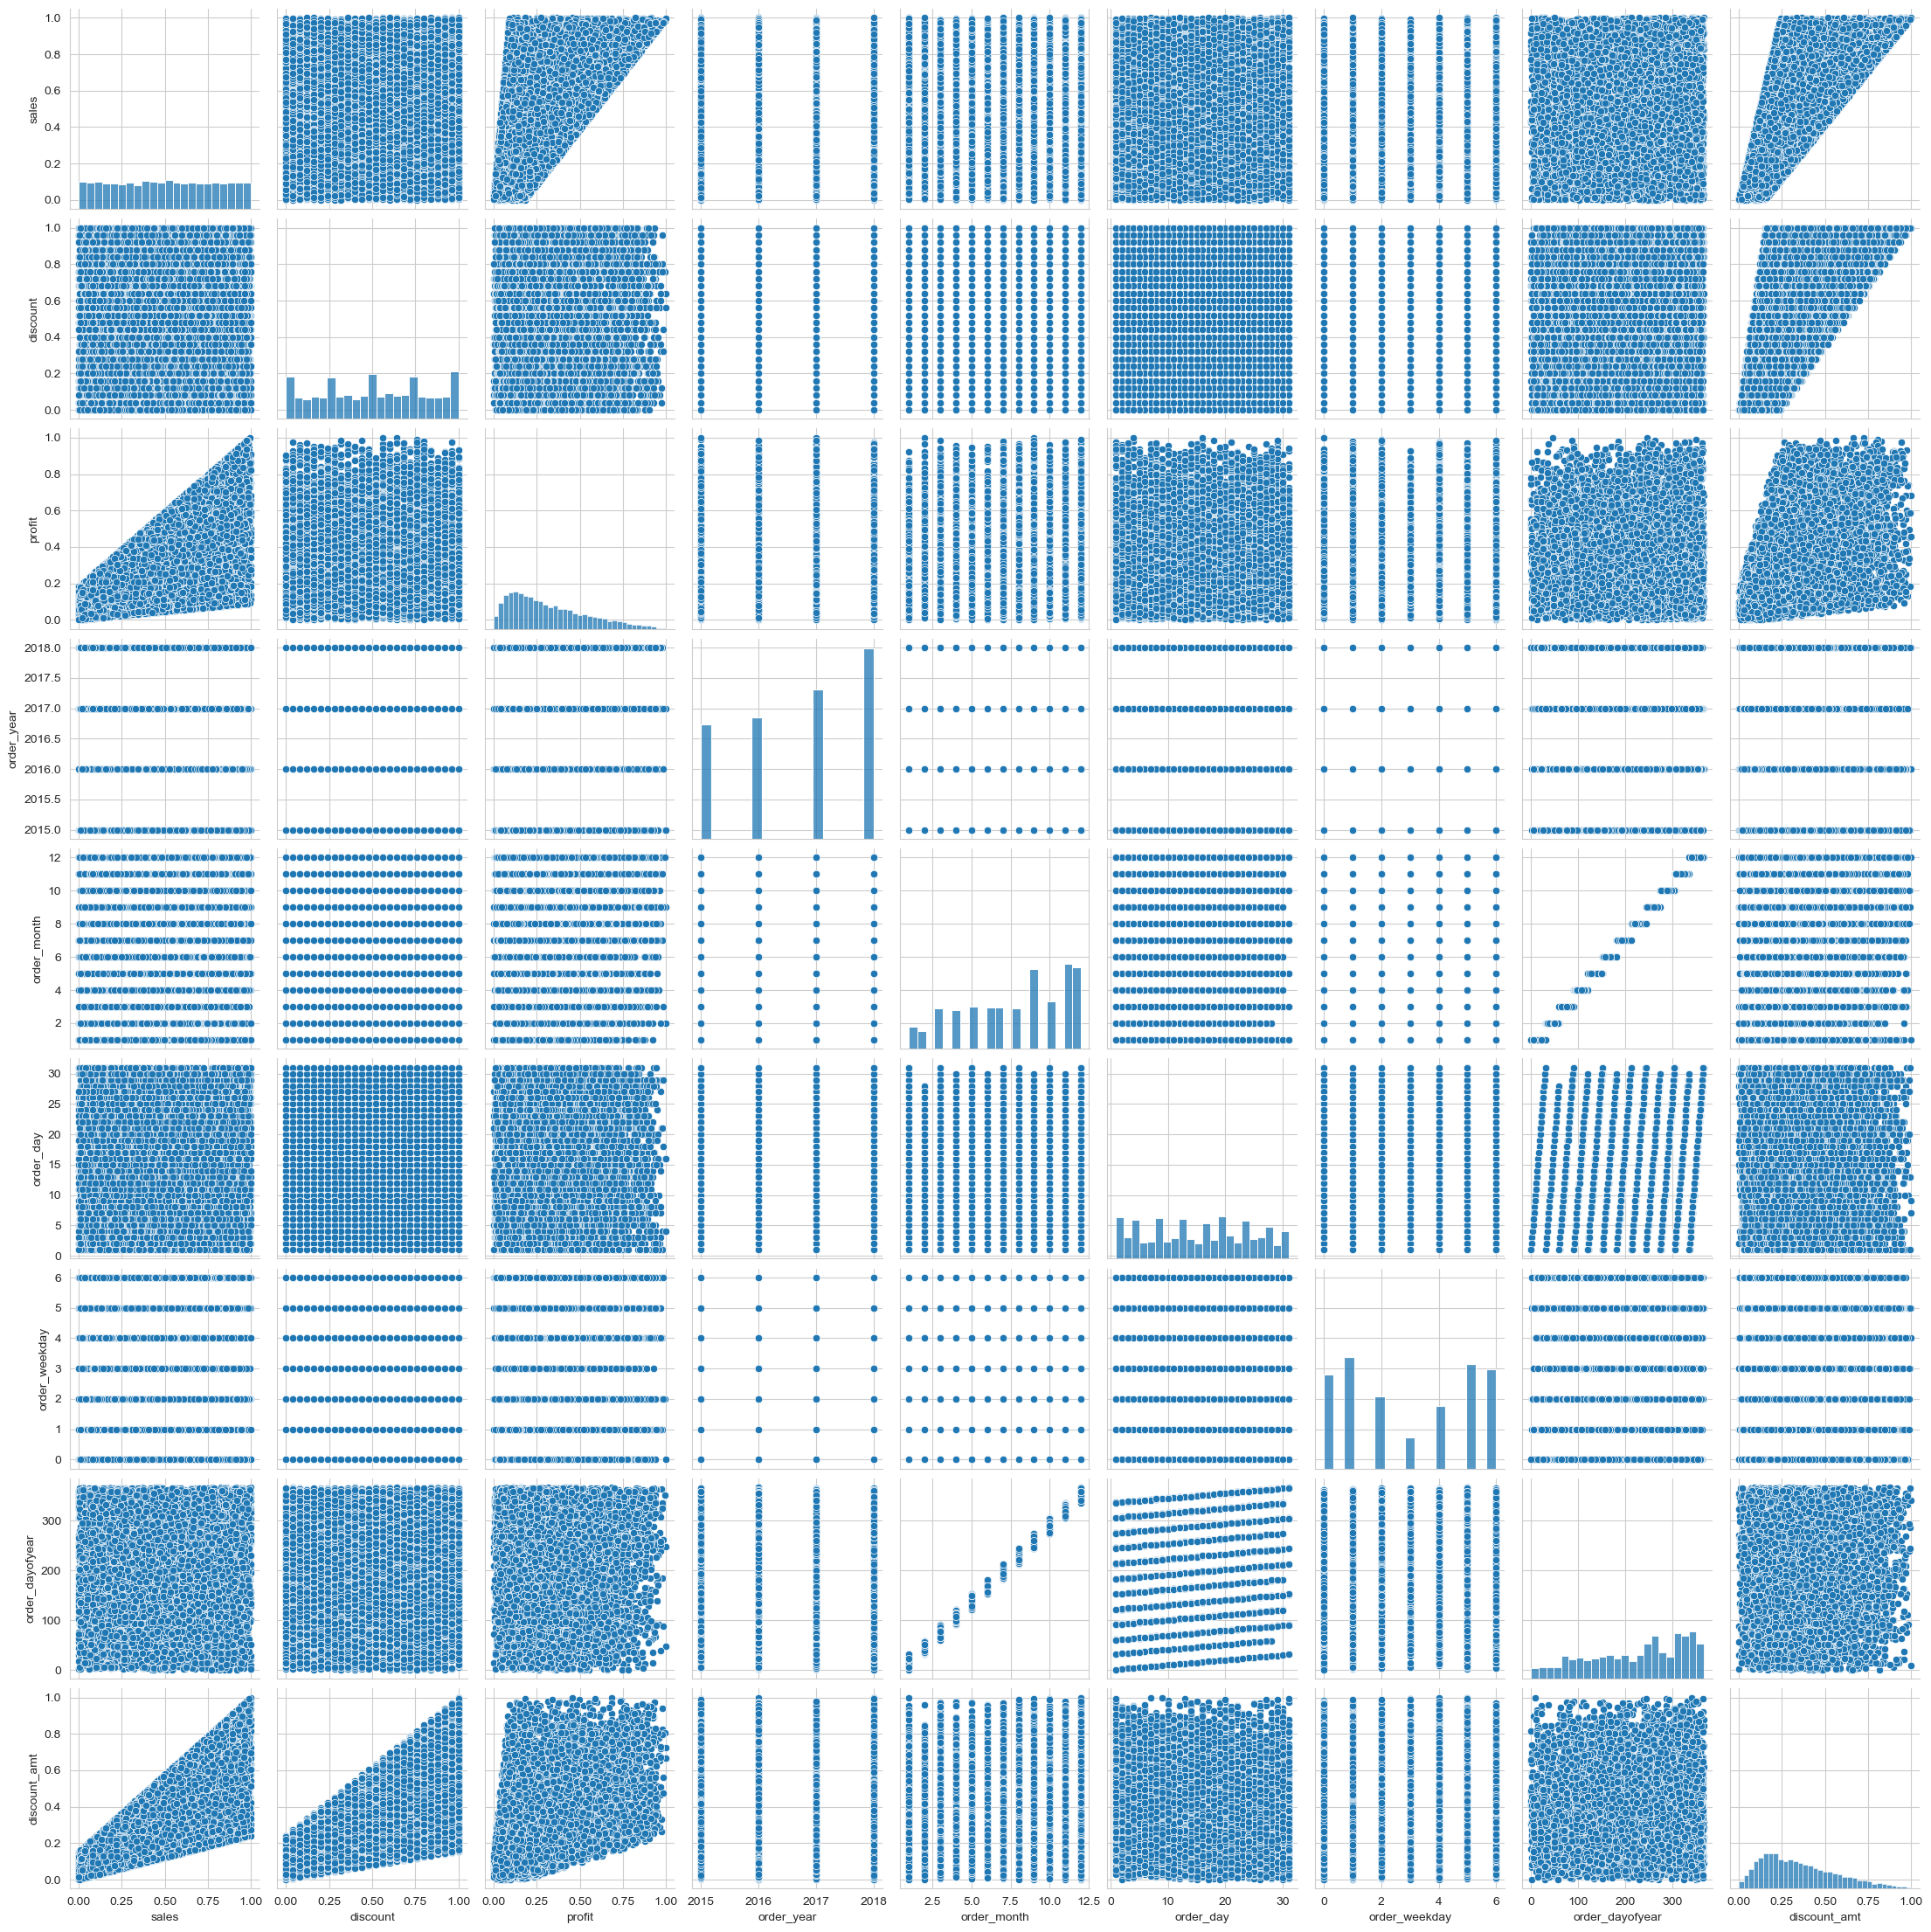

In [517]:
sns.pairplot(df)

C:\Users\Divyansh\AppData\Local\Temp\ipykernel_5636\437571606.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




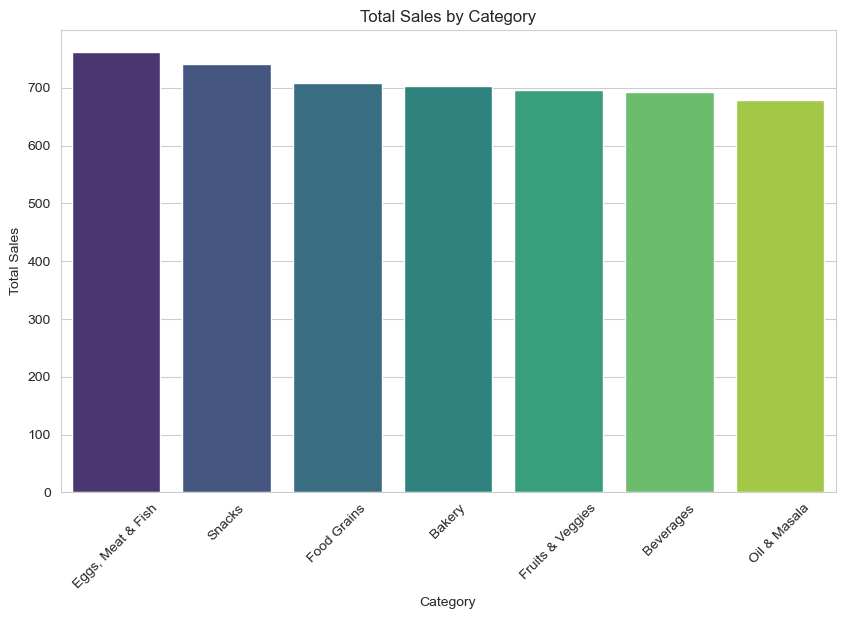

In [518]:
category_sales = df.groupby(['category'])['sales'].sum().reset_index()
category_sales = category_sales.sort_values(by='sales', ascending=False)  
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales['category'], y=category_sales['sales'],palette='viridis')  


plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)  # Uncomment if necessary

# Show the plot
plt.show()

C:\Users\Divyansh\AppData\Local\Temp\ipykernel_5636\3418320050.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




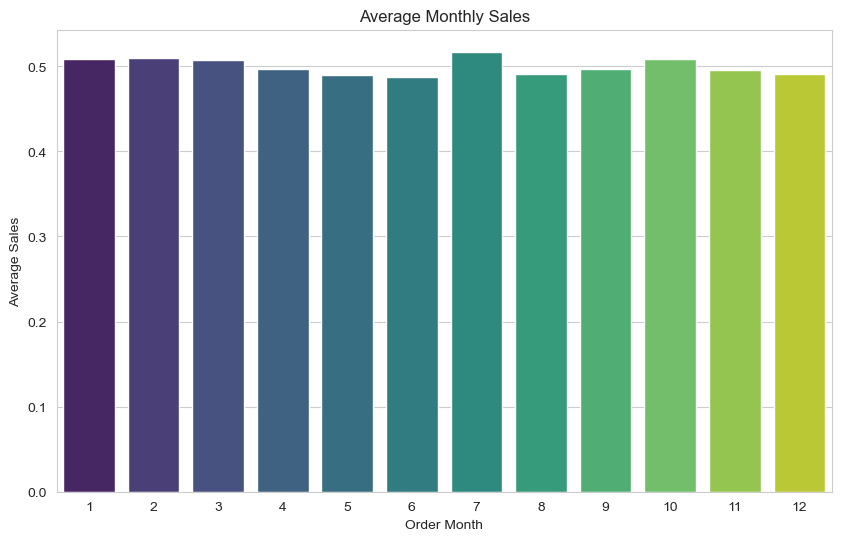

In [519]:
monthly_mean_sales = df.groupby('order_month')['sales'].mean()

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_mean_sales.index, y=monthly_mean_sales.values, palette='viridis')  # Use index for categories

plt.xlabel('Order Month')
plt.ylabel('Average Sales')
plt.title('Average Monthly Sales')

plt.show()

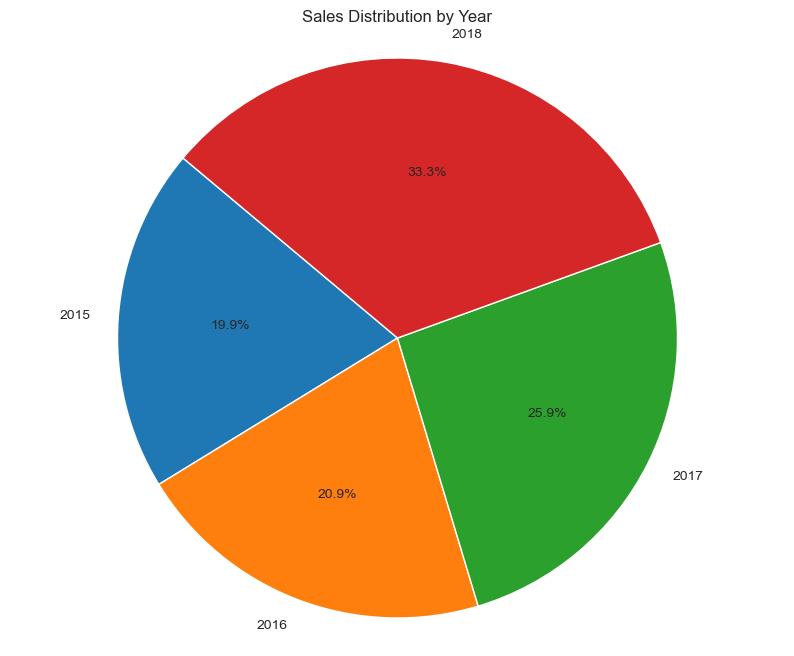

In [520]:
# Sales Distribution by Year
df['year'] = df['order date'].dt.year
yearly_sales = df.groupby('year')['sales'].sum().reset_index()
plt.figure(figsize=(10, 8))
plt.pie(yearly_sales['sales'], labels=yearly_sales['year'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Year')
plt.axis('equal')
plt.show()

In [521]:
df = pd.get_dummies(df, columns=['category', 'sub category', 'city', 'region','state'], drop_first=True)
df.head()

,order date,sales,discount,profit,order_year,order_month,order_day,order_weekday,order_dayofyear,discount_amt,...,city_Theni,city_Tirunelveli,city_Trichy,city_Vellore,city_Viluppuram,city_Virudhunagar,region_East,region_North,region_South,region_West
0,2017-11-08,0.3770,0.08,0.343187,2017,11,8,2,312,0.121212,...,False,False,False,True,False,False,False,True,False,False
1,2017-11-08,0.1245,0.32,0.113672,2017,11,8,2,312,0.103030,...,False,False,False,False,False,False,False,False,True,False
2,2017-06-12,0.9300,0.44,0.127727,2017,6,12,0,163,0.540606,...,False,False,False,False,False,False,False,False,False,True
3,2016-10-11,0.1980,0.60,0.058730,2016,10,11,1,285,0.210909,...,False,False,False,False,False,False,False,False,True,False
4,2016-10-11,0.9275,0.64,0.815187,2016,10,11,1,285,0.681212,...,False,False,False,False,False,False,False,False,True,False


In [522]:
df.to_csv('cleaned_data.csv', index=False)

**TRAIN TEST SPLIT**

In [524]:
x=df.drop(columns=["sales","order date",])
y=df['sales']

In [525]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [526]:
# Normalizing features
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

**LINEAR REGRESSION**

In [528]:
from sklearn.linear_model import LinearRegression

In [529]:
lr=LinearRegression()
print(type(x_train))
print(type(y_train))
print(x_train.dtypes)  

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
discount             float64
profit               float64
order_year             int32
order_month            int32
order_day              int32
                      ...   
city_Virudhunagar       bool
region_East             bool
region_North            bool
region_South            bool
region_West             bool
Length: 64, dtype: object


In [530]:
lr=LinearRegression()

In [531]:
lr.fit(x_train,y_train)

LinearRegression()

In [532]:
y_pred = lr.predict(x_test)  # Predictions 

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 4. R-squared (R²) Score
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.06748344005274588
Mean Squared Error (MSE): 0.008014008020057306
Root Mean Squared Error (RMSE): 0.08952099206363447
R-squared (R²): 0.9028064947714334


**RANDOM FOREST**

In [534]:
from sklearn.ensemble import RandomForestRegressor

In [535]:
#Initialize Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
                               
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Model - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest Model - MSE: 5.336946208104054e-05, R2: 0.9993527377213952


In [536]:
y_pred_rf = rf_model.predict(x_test)
# Calculate R² (regression accuracy)
r2_rf = rf_model.score(x_test, y_test)  
print(f"Random Forest - R²: {r2_rf}")

Random Forest - R²: 0.9993527377213952


**DECISION TREE**

In [538]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Model - MSE: {mse_dt}, R2: {r2_dt}")


Decision Tree Model - MSE: 0.0001874338419209605, R2: 0.9977268113471859


**HYPER PARAMETER TUNING OF DECISION TREE AND RANDOM FOREST**

In [540]:
rf_model2 = RandomForestRegressor(n_estimators=300, max_depth=14, min_samples_split=5, min_samples_leaf=2, random_state=42)
dt_model2 = DecisionTreeRegressor(max_depth=20, min_samples_split=11, random_state=42)
rf_model2.fit(x_train, y_train)
dt_model2.fit(x_train, y_train)
# Make predictions by the 2 model
y_pred_rf2 = rf_model2.predict(x_test)
y_pred_dt2=dt_model2.predict(x_test)

# Evaluation of the 2 models
mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
r2_rf2 = r2_score(y_test, y_pred_rf2)
mse_dt2 = mean_squared_error(y_test, y_pred_dt2)
r2_dt2 = r2_score(y_test, y_pred_dt2)
print(f"Random Forest Model - MSE: {mse_rf2}, R2: {r2_rf2}")
print(f"Decision Tree Model - MSE: {mse_dt2}, R2: {r2_dt2}")

Random Forest Model - MSE: 4.594030440260536e-05, R2: 0.9994428381897071
Decision Tree Model - MSE: 0.00025473549912985205, R2: 0.9969105800737142


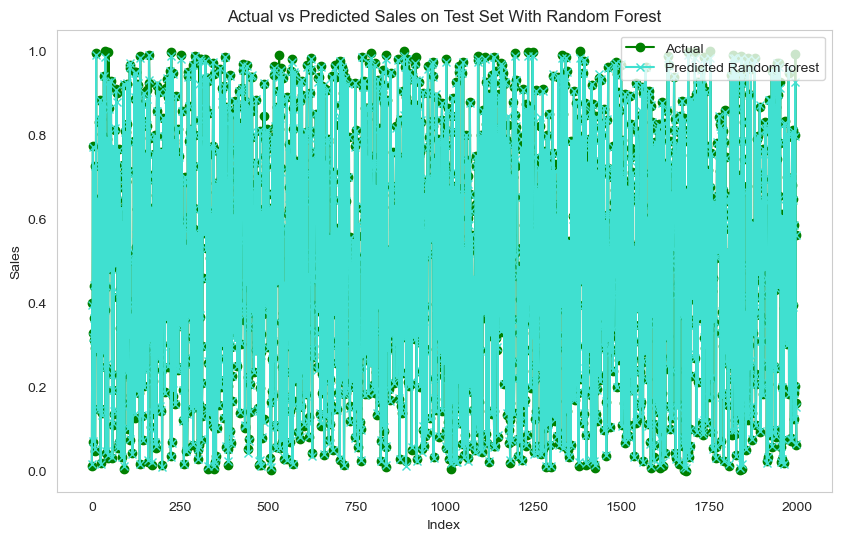

In [541]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o', c='green')
plt.plot(y_pred_rf2, label='Predicted Random forest', marker='x', c='turquoise')
plt.title('Actual vs Predicted Sales on Test Set With Random Forest')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [542]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


**XGBOOST**

In [544]:
from xgboost import XGBRegressor

# Initialize XGBoost model
xgb = XGBRegressor(random_state=42)

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Test MSE: {mse_xgb}")
print(f"XGBoost Test R²: {r2_xgb}")

# Comparison with Random Forest Hypertuned
y_pred_rf2 = rf_model2.predict(x_test)
mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
r2_rf2 = r2_score(y_test, y_pred_rf2)

print(f"Random Forest Test MSE: {mse_rf}")
print(f"Random Forest Test R²: {r2_rf}")
print(f"Decision Tree Model - MSE: {mse_dt2}, R2: {r2_dt2}")
print(f"Linear Regression Mean Squared Error (MSE): {mse}")
print(f"Linear Regression R-squared (R²): {r2}")

XGBoost Test MSE: 0.00012965762872547368
XGBoost Test R²: 0.9984275184921312
Random Forest Test MSE: 5.336946208104054e-05
Random Forest Test R²: 0.9993527377213952
Decision Tree Model - MSE: 0.00025473549912985205, R2: 0.9969105800737142
Linear Regression Mean Squared Error (MSE): 0.008014008020057306
Linear Regression R-squared (R²): 0.9028064947714334


In [545]:
import joblib
joblib.dump(rf_model2, 'random_forest_model.joblib')


['random_forest_model.joblib']

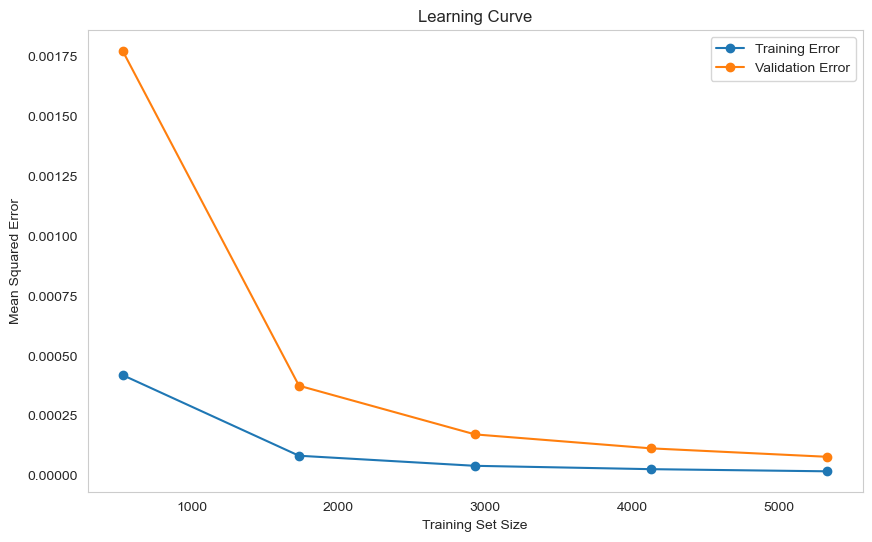

In [546]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, x, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=3, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
    plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='o')
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid()
    plt.show()
plot_learning_curve(rf_model2, x_train, y_train)
